In [4]:
import numpy as np
import scipy as sp
from scipy import signal
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
# Load image of Van Gogh, convert from BGR to RGB image
I = cv.imread('data/van-gogh.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)

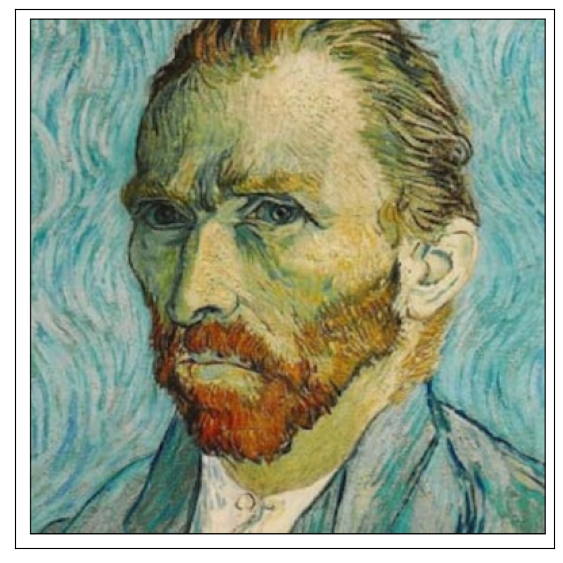

In [6]:
plt.figure(figsize=(7,7))
plt.imshow(I)
plt.xticks([])
plt.yticks([]);

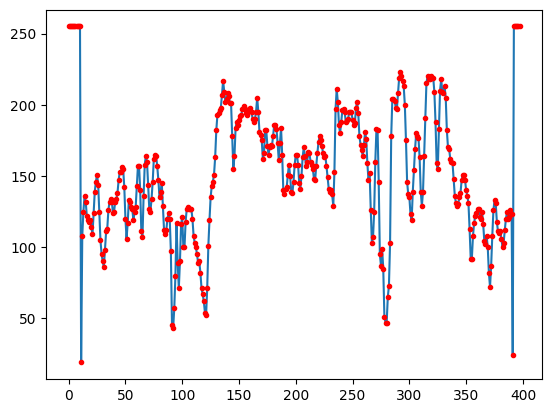

In [7]:
row = 200
rowI = I[row,:,0]
plt.figure()
plt.plot(rowI,'-')
plt.plot(rowI,'r.');

In [8]:
# Using kernel to compute mean
signal = rowI[0:5]
kernel = np.array([1,1,1,1,1]) / 5

print(rowI[0:5])
print('A = ', np.mean(rowI[0:5]))
print('B = ', np.dot(kernel, signal))

[255 255 255 255 255]
A =  255.0
B =  255.0


In [9]:
# Performing moving averages

In [10]:
width = 5
signal = rowI
kernel = np.ones(2*width+1)/(2*width+1) # Array to represent the window (constant-valued)
result = np.ones(len(signal)-2*width)   # Array to store computed moving averages
for i in range(len(result)):
    centre = i + width
    result[i] = np.dot(kernel, signal[centre-width:centre+width+1])

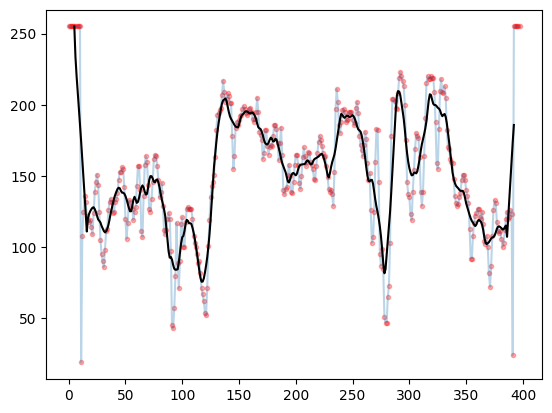

In [11]:
# Generate a plot of the original 1D signal and its average
plt.figure()
plt.plot(signal,'r.', alpha=0.3)
plt.plot(signal,'-', alpha=0.3)
plt.plot(np.arange(width, len(signal)-width),result,'k-');

In [12]:
## Linear Filtering in 1D

In [13]:
# Flipping kernel
kernel = np.array([3,1,2,1,3])
flipped_kernel = np.flip(kernel)
print('Symmetric kernel')
print(f'kernel={kernel}, flipped={flipped_kernel}')

kernel = np.array([1,1,2,2,3])
flipped_kernel = np.flip(kernel)
print('Asymmetric kernel')
print(f'kernel={kernel}, flipped={flipped_kernel}')

Symmetric kernel
kernel=[3 1 2 1 3], flipped=[3 1 2 1 3]
Asymmetric kernel
kernel=[1 1 2 2 3], flipped=[3 2 2 1 1]


In [14]:
# Computing a 1D convolution from scratch
f = np.array([1,3,4,1,10,3,0,1])
h = np.array([1,0,-1])
width = 1
result = np.ones(len(f)-2*width)   # Array to store computed moving averages
for i in range(len(result)):
    centre = i + width
    result[i] = np.dot(h[::-1], f[centre-width:centre+width+1])
print(f'signal f:\t\t{f}')
print(f'kernel h:\t\t{h}')
print(f'convolution (f*h):\t{result}')

signal f:		[ 1  3  4  1 10  3  0  1]
kernel h:		[ 1  0 -1]
convolution (f*h):	[  3.  -2.   6.   2. -10.  -2.]


In [15]:
# Computing a 1D convolution using np.convolve
f = np.array([1, 3, 4, 1, 10, 3, 0, 1])
h = np.array([1, 0, -1])
r = np.convolve(f, h, mode='valid')
print(f'signal f:\t\t{f}')
print(f'kernel h:\t\t{h}')
print(f'convolution (f*h):\t{r}')

signal f:		[ 1  3  4  1 10  3  0  1]
kernel h:		[ 1  0 -1]
convolution (f*h):	[  3  -2   6   2 -10  -2]


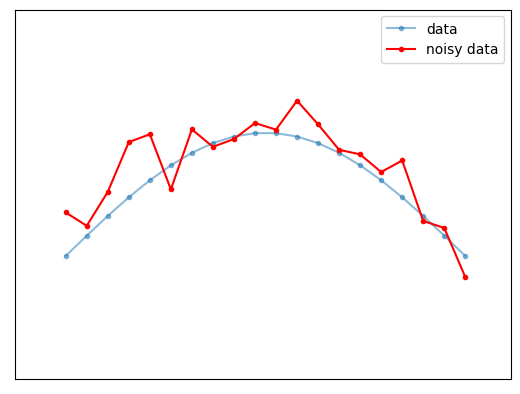

In [16]:
# Gaussian smoothing for noise removal
np.random.seed(0)
n = 20
x = np.linspace(0, np.pi, n)
y = np.sin(x)
mu = 0.0
sigma = 0.2
y_noisy = y + np.random.normal(mu, sigma, n)

plt.plot(x,y,'.-', label='data', alpha=0.5)
plt.plot(x,y_noisy,'.-r', label='noisy data')
plt.xlim(-.4,3.5)
plt.ylim(-1,2)
plt.xticks([])
plt.yticks([])
plt.legend(['data', 'noisy data']);

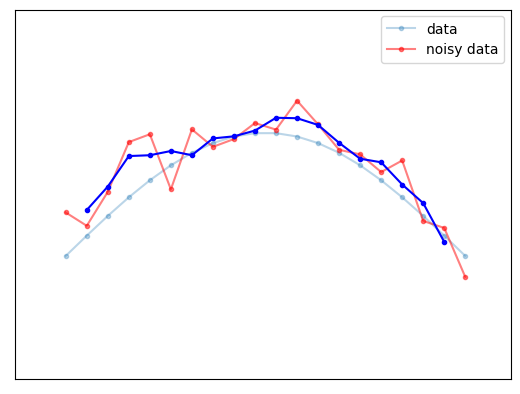

In [17]:
# Recover original signal (data) from corrupted signal (noisy data) using smoothing
f = y_noisy
width = 1
h = np.ones(2*width+1)/(2*width+1)
result = np.ones(len(f)-2*width)   # Array to store computed moving averages
for i in range(len(result)):
    centre = i + width
    result[i] = np.dot(h[::-1], f[centre-width:centre+width+1])

plt.plot(x,y,'.-', label='data', alpha=0.3)
plt.plot(x,y_noisy,'.-r', label='noisy data', alpha=0.5)
plt.plot(x[width:-width],result,'.-b', label='noisy data')
plt.xlim(-.4,3.5)
plt.ylim(-1,2)
plt.xticks([])
plt.yticks([])
plt.legend(['data', 'noisy data']); 

In [18]:
## Gaussian in 1D

In [19]:
# Evaluating Gaussian at a particular value

In [20]:
mu = 2
sigma = 3

In [21]:
def g(mu, s, x):
    exponent = -((x - mu)**2)/(2*s*s)
    constant = 1/(s * np.sqrt(2 * np.pi))
    return constant * np.exp(exponent)

In [22]:
g_ = np.empty(20)
for i in range(-10,10):
    g_[i-10] = g(mu, sigma, i)
    print(f'Gaussian with mu={mu} and sigma={sigma} evaluated at {i} is {g_[i-10]}')

Gaussian with mu=2 and sigma=3 evaluated at -10 is 4.461007525496179e-05
Gaussian with mu=2 and sigma=3 evaluated at -9 is 0.0001600902172069401
Gaussian with mu=2 and sigma=3 evaluated at -8 is 0.0005140929987637022
Gaussian with mu=2 and sigma=3 evaluated at -7 is 0.001477282803979336
Gaussian with mu=2 and sigma=3 evaluated at -6 is 0.003798662007932481
Gaussian with mu=2 and sigma=3 evaluated at -5 is 0.008740629697903166
Gaussian with mu=2 and sigma=3 evaluated at -4 is 0.017996988837729353
Gaussian with mu=2 and sigma=3 evaluated at -3 is 0.03315904626424957
Gaussian with mu=2 and sigma=3 evaluated at -2 is 0.05467002489199788
Gaussian with mu=2 and sigma=3 evaluated at -1 is 0.0806569081730478
Gaussian with mu=2 and sigma=3 evaluated at 0 is 0.10648266850745075
Gaussian with mu=2 and sigma=3 evaluated at 1 is 0.12579440923099774
Gaussian with mu=2 and sigma=3 evaluated at 2 is 0.1329807601338109
Gaussian with mu=2 and sigma=3 evaluated at 3 is 0.12579440923099774
Gaussian with m

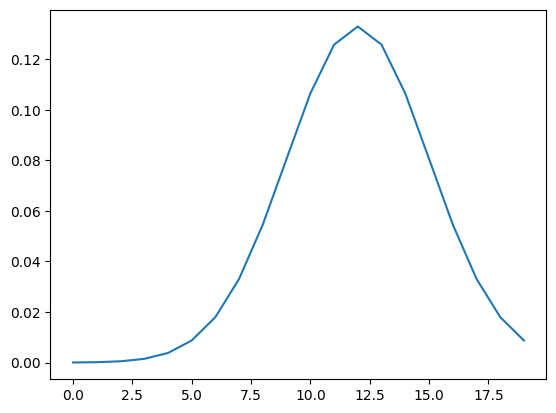

In [23]:
plt.plot(g_);

In [24]:
# Vectorized code for evaluating Gaussian over a range of values

In [25]:
def gaussian1d(mu, sig, n, normalized=True):
    s = n//2    
    x = np.linspace(-s,s,n)
    exponent_factor = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    normalizing_factor = 1. if not normalized else 1./(sig * np.sqrt(2*np.pi))
    return normalizing_factor * exponent_factor

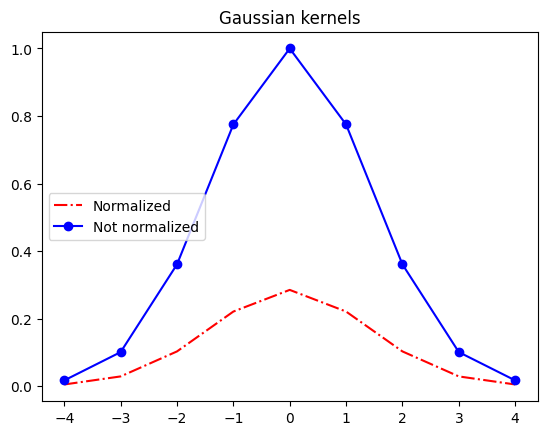

In [26]:
n = 9
width = n // 2
sigma = 1.4

g1 = gaussian1d(0.0, sigma, n, normalized=True)
g2 = gaussian1d(0.0, sigma, n, normalized=False)

plt.plot(np.linspace(-width,width,n), g1, 'r-.', label='Normalized')
plt.plot(np.linspace(-width,width,n), g2, 'b-o', label='Not normalized')
plt.title('Gaussian kernels')
plt.legend(loc='center left');

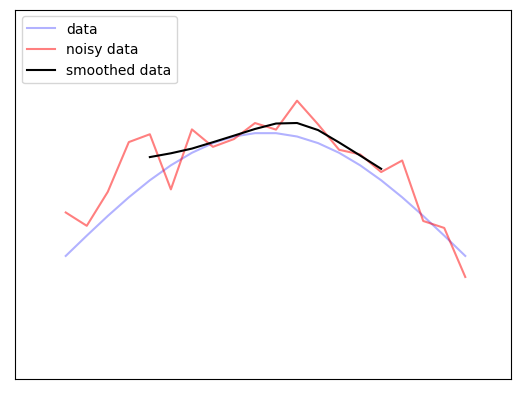

In [27]:
y_smoothed = np.convolve(y_noisy, g1, mode='valid')

plt.plot(x,y,'b', label='data', alpha=0.3)
plt.plot(x,y_noisy,'r', label='noisy data', alpha=0.5)
plt.plot(x[width:-width],y_smoothed,'k', label='smoothed data')
plt.xlim(-.4,3.5)
plt.ylim(-1,2)
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper left')

In [28]:
## Linear Filter in 2D

In [29]:
f = np.linspace(0,15,16).reshape((4,4))
h = np.ones((3,3))

print(f'f = \n{f}')
print(f'h = \n{h}')

f = 
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
h = 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [30]:
# Compute (f ∗ k)_{(i, j)} where (i, j) = (1, 2)
foo = f[:3,1:]
print(foo)
print(np.reshape(foo, (9)))
print(np.reshape(h, (9)))

print(np.dot(np.reshape(foo, (9)), np.reshape(h, (9))))

[[ 1.  2.  3.]
 [ 5.  6.  7.]
 [ 9. 10. 11.]]
[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
54.0


In [31]:
# 2D Averaging Kernels

In [32]:
average_3_by_3 = np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]], dtype='float32')

In [33]:
# Construct a 3-by-3 averaging kernel
average_3_by_3 = average_3_by_3/np.sum(average_3_by_3)
print(f'average_3_by_3 = \n{average_3_by_3}')

average_3_by_3 = 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [34]:
# Convolution with averaging kernels

In [35]:
average_3_by_3 = np.ones(9).reshape(3,3) / 9
average_5_by_5 = np.ones(25).reshape(5,5) / 25
average_7_by_7 = np.ones(49).reshape(7,7) / 49

In [36]:
print(f'average_5_by_5 = \n{average_5_by_5}')

average_5_by_5 = 
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


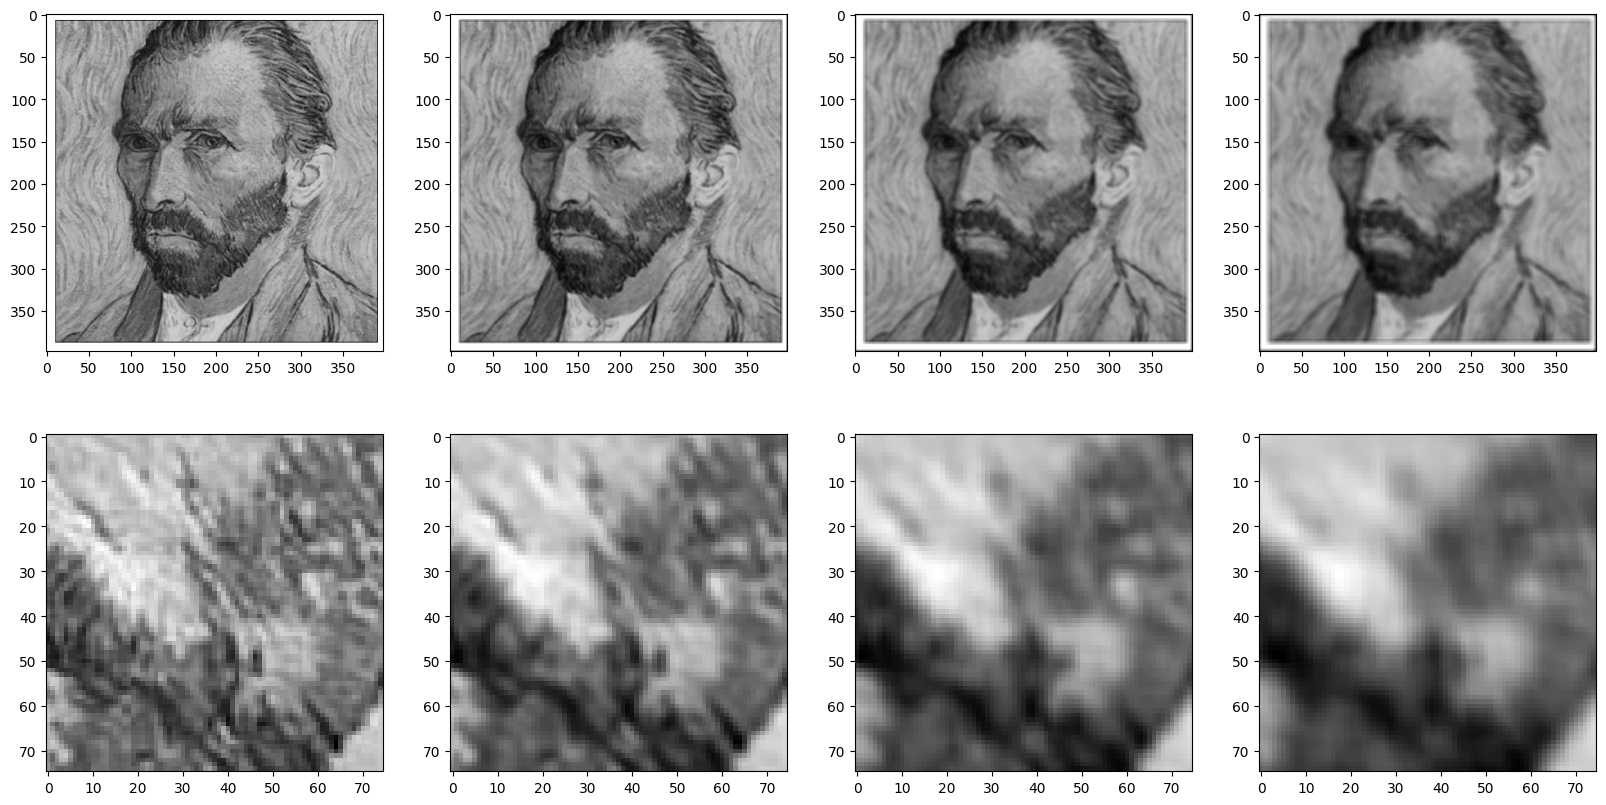

In [37]:
I_gray = cv.cvtColor(I, cv.COLOR_BGR2GRAY)

I3 = sp.signal.convolve2d(I_gray, average_3_by_3, mode='same')
I5 = sp.signal.convolve2d(I_gray, average_5_by_5, mode='same')
I7 = sp.signal.convolve2d(I_gray, average_7_by_7, mode='same')

plt.figure(figsize=(20,10))
plt.subplot(241)
plt.imshow(I_gray, cmap='gray')
plt.subplot(242)
plt.imshow(I3, cmap='gray')
plt.subplot(243)
plt.imshow(I5, cmap='gray')
plt.subplot(244)
plt.imshow(I7, cmap='gray')
plt.subplot(245)
plt.imshow(I_gray[215:290,175:250], cmap='gray')
plt.subplot(246)
plt.imshow(I3[215:290,175:250], cmap='gray')
plt.subplot(247)
plt.imshow(I5[215:290,175:250], cmap='gray')
plt.subplot(248)
plt.imshow(I7[215:290,175:250], cmap='gray');

In [38]:
# A 2D Kernel that shifts images by two pixels
shift_right = np.array([[0,0,0,0,0],
                        [0,0,0,0,0],
                        [0,0,0,0,1],
                        [0,0,0,0,0],
                        [0,0,0,0,0]], dtype='float32')

shift_left = np.array([[0,0,0,0,0],
                       [0,0,0,0,0],
                       [1,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0]], dtype='float32')

In [39]:
# A 2D Kernel for finding edges pixels

In [40]:
sobel_x = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]], dtype='float32')

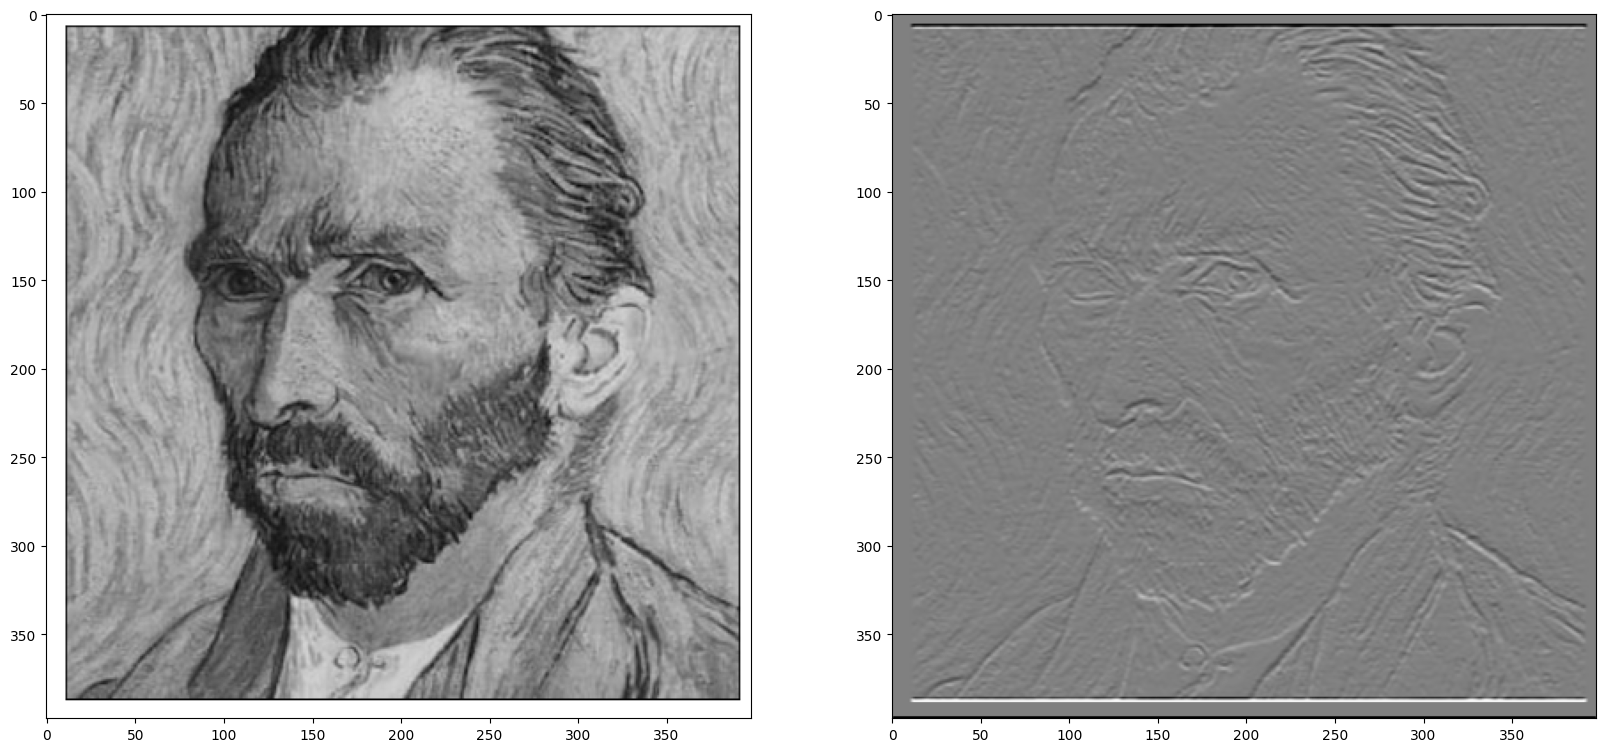

In [41]:
E_horizontal = sp.signal.convolve2d(I_gray, sobel_x, mode='same')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(I_gray, cmap='gray')
plt.subplot(122)
plt.imshow(E_horizontal, cmap='gray');

In [42]:
sobel_y = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]], dtype='float32')

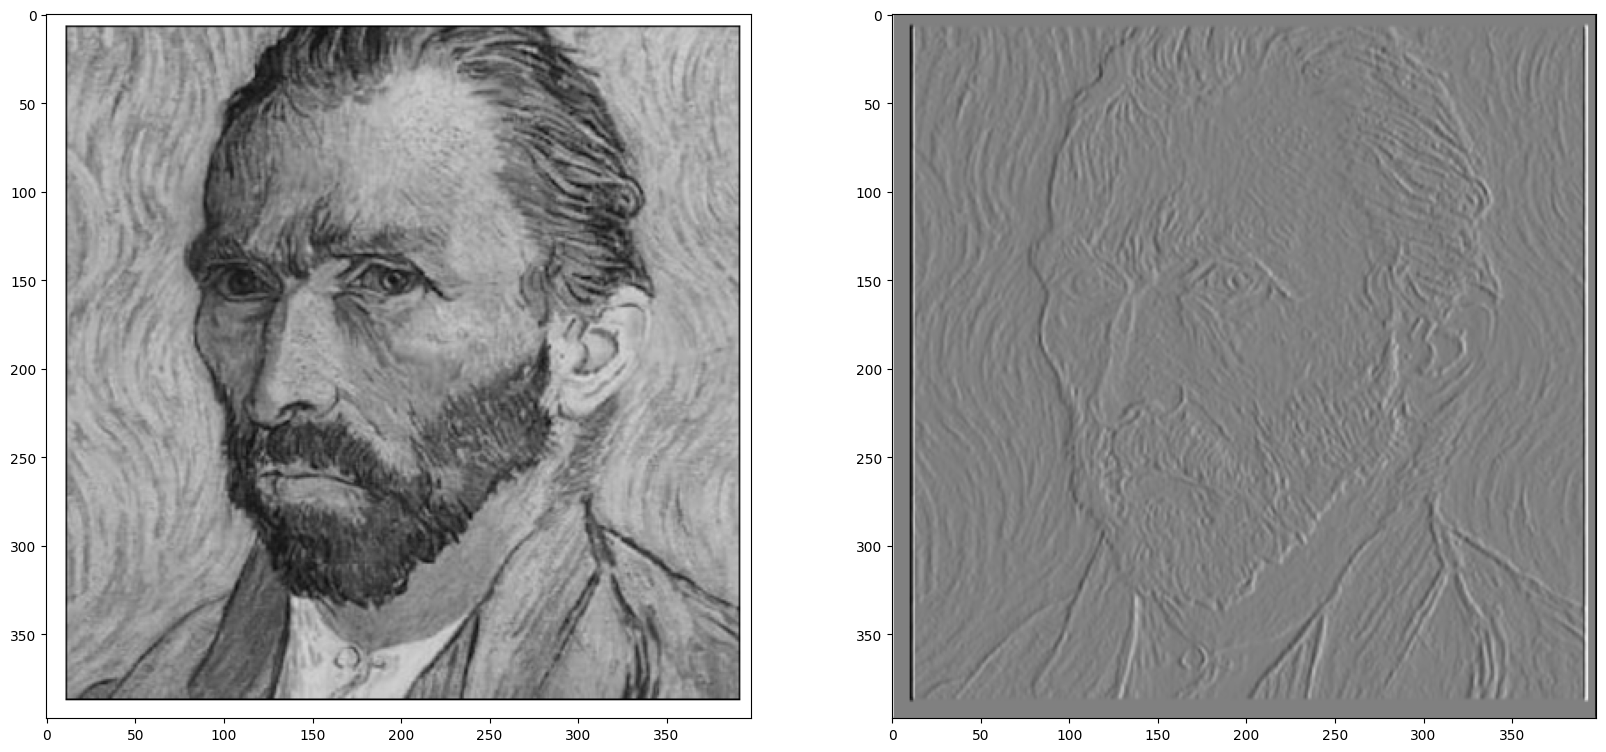

In [43]:
E_vertical = sp.signal.convolve2d(I_gray, sobel_y, mode='same')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(I_gray, cmap='gray')
plt.subplot(122)
plt.imshow(E_vertical, cmap='gray')

In [44]:
## Multivariate Gaussian

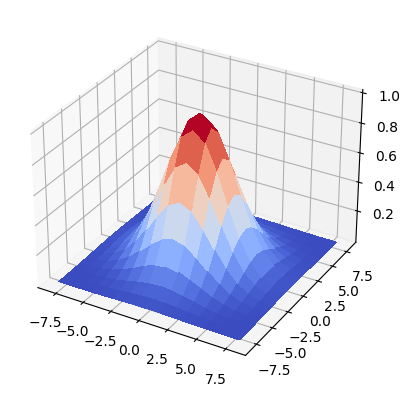

In [45]:
# Evaluates 2D Gaussian on xy grid.
# xy is two channel 2D matrix.  The first channel stores x coordinates
# [-1 0 1]
# [-1 0 1]
# [-1 0 1]
# and the second channel stores y coordinates
# [-1 -1 -1]
# [0   0  0]
# [1   1  1]
# So then we can pick out an xy value using xy[i,j,:].
# Check out gaussian2_n() to see how you can construct such
# an xy using numpy
#
# For gaussian2_xy() and gaussian2_n() methods
# mean is a 2x1 vector and cov is a 2x2 matrix

def gaussian2_xy(mean, cov, xy):
    invcov = np.linalg.inv(cov)
    results = np.ones([xy.shape[0], xy.shape[1]])
    for x in range(0, xy.shape[0]):
        for y in range(0, xy.shape[1]):
            v = xy[x,y,:].reshape(2,1) - mean
            results[x,y] = np.dot(np.dot(np.transpose(v), invcov), v)
    results = np.exp( - results / 2 )
    return results 

def gaussian2_n(mean, cov, n):
    s = n//2
    x = np.linspace(-s,s,n)
    y = np.linspace(-s,s,n)
    xc, yc = np.meshgrid(x, y)
    xy = np.zeros([n, n, 2])
    xy[:,:,0] = xc
    xy[:,:,1] = yc

    return gaussian2_xy(mean, cov, xy), xc, yc

def gaussian2d(var, n):
    mean =  np.array([0, 0])
    mean = mean.reshape(2,1)
    cov = np.array([[var,0],[0,var]])
    k, xc, yc = gaussian2_n(mean, cov, n)
    return k
    
n = 111
mean =  np.array([0, 0])
mean = mean.reshape(2,1)
cov = np.array([[7,0],[0,7]])
g2d_kernel, xc, yc = gaussian2_n(mean, cov, 17)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xc, yc, g2d_kernel,rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)

In [46]:
a = np.array([1,2,3])
b = np.array([4,5,6])

sum = 0
for i in range(3):
    sum = sum + a[i]*b[i]
print(sum)

print(np.dot(a,b))

a = np.reshape(a, (1,3))
print(a)
b = np.reshape(b, (3,1))
print(b)
np.dot(a, b)

32
32
[[1 2 3]]
[[4]
 [5]
 [6]]


array([[32]])

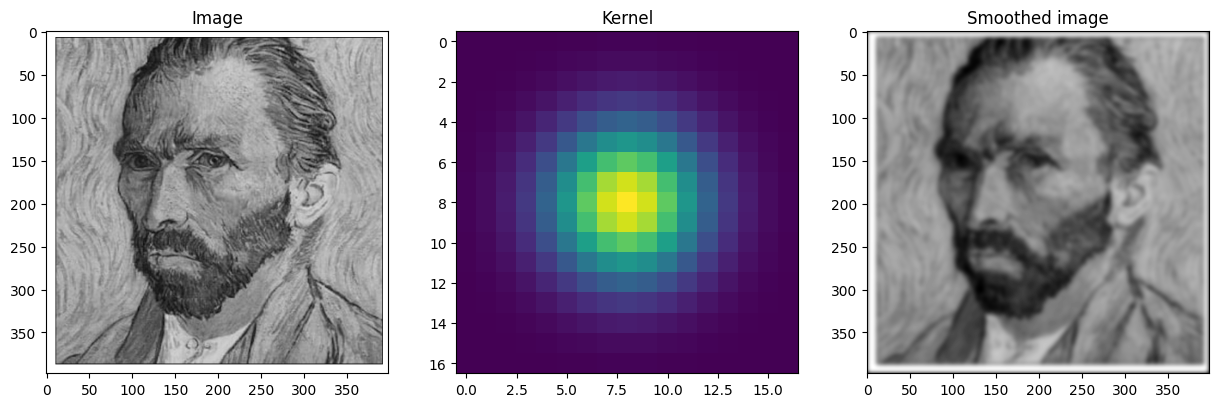

In [47]:
# Don't forget to normalize the kernel weights.
g2d_kernel_normalized = g2d_kernel / np.sum(g2d_kernel)

# Use scipy.signal.convolve2d for 2D convolutions
img_gaussian_smooth = sp.signal.convolve2d(I_gray, g2d_kernel_normalized, mode='same', boundary='fill')

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Image')
plt.imshow(I_gray,cmap='gray')
plt.subplot(132)
plt.title('Kernel')
plt.imshow(g2d_kernel_normalized)
plt.subplot(133)
plt.title('Smoothed image')
plt.imshow(img_gaussian_smooth,cmap='gray');

In [48]:
## Gaussian Filter

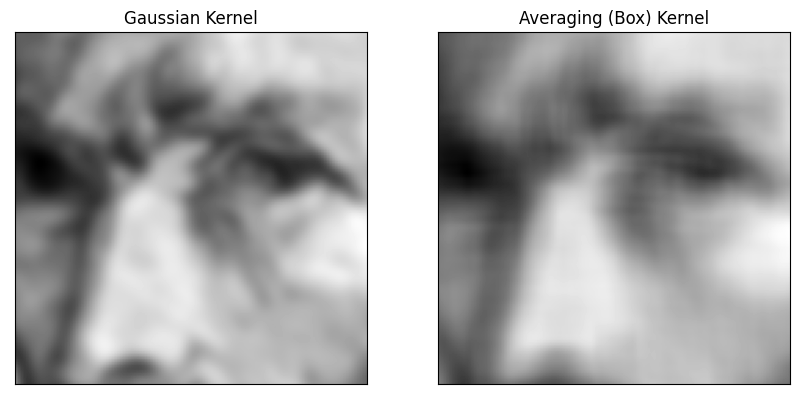

In [49]:
# Applying 2D Gaussian & averaging kernels
# Blurring the image I_gray with two different kernels
width = 15

# Construct & apply 15x15 Gaussian kernel
gaussian_kernel = gaussian2d(7, width)
I_gauss = sp.signal.convolve2d(I_gray, gaussian_kernel, mode='same', boundary='fill')

# Construct & apply 15x15 averaging kernel
width = 15
averaging_kernel = np.ones([width, width])/(width*width)
I_ave = sp.signal.convolve2d(I_gray, averaging_kernel, mode='same', boundary='fill')

# Generate plots
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Gaussian Kernel')
plt.xticks([])
plt.yticks([])
plt.imshow(I_gauss[100:228,100:228], cmap='gray')
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.title('Averaging (Box) Kernel')
plt.imshow(I_ave[100:228,100:228], cmap='gray');

In [50]:
## Separability

In [51]:
# Separable Filters

In [52]:
F = np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)
print('F =\n{}'.format(F))

print(np.linalg.matrix_rank(F))

u, s, vh = np.linalg.svd(F)
print(f'Singular values of F are: {s}')

print(u)
print(vh)

F =
[[1 2 1]
 [2 4 2]
 [1 2 1]]
1
Singular values of F are: [6.00000000e+00 4.53246652e-16 0.00000000e+00]
[[-4.08248290e-01  9.12870929e-01 -4.16416654e-17]
 [-8.16496581e-01 -3.65148372e-01 -4.47213595e-01]
 [-4.08248290e-01 -1.82574186e-01  8.94427191e-01]]
[[-0.40824829 -0.81649658 -0.40824829]
 [-0.91287093  0.36514837  0.18257419]
 [ 0.         -0.4472136   0.89442719]]


In [53]:
if s[~np.isclose(s, 0)].shape == (1,):
    print('Filter F_original is separable')
    ind = np.where(np.isclose(s, 0) == False)[0][0]
    s_1 = s[~np.isclose(s, ind)]
    fv = np.sqrt(s_1)*u[:,ind].reshape(3,1)
    fh = np.sqrt(s_1)*vh[ind,:].reshape(1,3)
    print('fv:\n {}'.format(fv))
    print('fh:\n {}'.format(fh))
    print('F_reconstructed:\n {}'.format(np.dot(fv, fh)))
else:
    print('Filter F is not separable')

Filter F_original is separable
fv:
 [[-1.]
 [-2.]
 [-1.]]
fh:
 [[-1. -2. -1.]]
F_reconstructed:
 [[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


In [54]:
S = np.array([2,3,3,3,5,5,4,4,6]).reshape(3,3)

print('S*F: \n{}'.format(sp.signal.convolve2d(S, F, mode='valid')))

Sv = sp.signal.convolve2d(S, fv, mode='valid')
print('Sv=S*fv: \n{}'.format(Sv))
print('Sv*fh: \n{}'.format(sp.signal.convolve2d(Sv, fh, mode='valid')))

S*F: 
[[65]]
Sv=S*fv: 
[[-12. -17. -19.]]
Sv*fh: 
[[65.]]


In [55]:
# Integral Images
X = np.array([1,2,3,-1,3,2,34,5,3,2,3,2,3,42,5,-3,1,4,98,3,1,2,3,2,5], dtype=np.float32).reshape(5,5)
print('X:\n {}'.format(X))
S = cv.integral(X)[1:,1:]
print('Integral image of X:\n {}'.format(S))

X:
 [[ 1.  2.  3. -1.  3.]
 [ 2. 34.  5.  3.  2.]
 [ 3.  2.  3. 42.  5.]
 [-3.  1.  4. 98.  3.]
 [ 1.  2.  3.  2.  5.]]
Integral image of X:
 [[  1.   3.   6.   5.   8.]
 [  3.  39.  47.  49.  54.]
 [  6.  44.  55.  99. 109.]
 [  3.  42.  57. 199. 212.]
 [  4.  45.  63. 207. 225.]]
